In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing necessary libraries

### Exploring the data

In [2]:
df = pd.read_csv('Dataset/application_data.csv') #Importing dataset

In [3]:
df.info() #Displaying the information of Datatypes so as to explore the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df.describe() #Describing dataset in order to find metrics of each variable

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
df.shape #Finding out the number of records we are working with which comes out to be 307511

(307511, 122)

### Data cleaning

In [6]:
df.isna().sum() / len(df)*100  #Initializing data cleaning process by finding out percentage of null values in each column

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [7]:
#Determining the columns having more than 30% null values
nullVal = df.isna().sum()
nullVal = nullVal[nullVal.values>(0.3*len(nullVal))]
len(nullVal)

64

#### There are 64 columns which have more than 30% null values which we decide to drop

In [8]:
nullVal = list(nullVal[nullVal.values>=0.3].index)
df.drop(labels=nullVal, axis=1, inplace=True)

In [9]:
df.isna().sum() / len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


#### Since the null values in Ammount Annuity is very less we can impute the null values with median of the variable

In [10]:
df.AMT_ANNUITY.isna().sum()

12

In [11]:
df.AMT_ANNUITY.fillna(value=df.AMT_ANNUITY.median(), inplace=True)

In [12]:
df.AMT_ANNUITY.isna().sum()

0

In [13]:
df.isna().sum() #0 null values in relevant columns after removing null values from AMT_ANNUITY

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [14]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG

In [15]:
#Removing irrelevant columns for Data Analysis

irrelevant = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df.drop(labels = irrelevant, axis=1, inplace=True)

In [16]:
df.shape #we are left with 28 relevant columns with which we would like to work with

(307511, 28)

In [17]:
df.columns #Checking the columns left after the dropping of irrelevant collumns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [18]:
df.info() #Checking out the data frame after removal of irrelevant columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

### Some categorical columns contain XNA for no record present, checking for the XNA in various categorical columns

In [19]:
df.FLAG_OWN_CAR.value_counts() 

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [20]:
df.CODE_GENDER.value_counts() #4 XNA present

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [21]:
df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [22]:
df.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [23]:
df.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [24]:
df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [25]:
df.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [26]:
df.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [27]:
df.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [28]:
df.ORGANIZATION_TYPE.value_counts() #55374 XNA Records

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### From the above analysis we find that the columns CODE_GENDER and ORGANIZATION_TYPE contain XNA 

#### Imputing CODE_GENDER XNA with mode that is 'F'

In [29]:
df.CODE_GENDER.replace(to_replace='XNA', value='F', inplace=True)
df.CODE_GENDER.value_counts() #no more XNA

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Since XNA is very high in ORGANIZATION_TYPE Dropping the rows with OGANIZATION_TYPE 'XNA'

In [30]:
df = df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)

In [31]:
df.ORGANIZATION_TYPE.value_counts() #XNA values elimnated

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252137 non-null  float64
 10  NAME_INCOME_TYPE             252137 non-null  object 
 11  NAME_EDUCATION_TYPE          252137 non-null  object 
 12  NAME_FAMILY_STATUS           252137 non-null  object 
 13 

In [33]:
#As we can see there are many Dtypes as int64, float64 etc. hence we cast all of them to numeric type

numeric = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
df[numeric] = df[numeric].apply(pd.to_numeric)

In [34]:
#Binning 'AMT_INCOME_TOTAL'
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
df['AMT_INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'], bins, labels=slots)

In [35]:
#Binning 'AMT_CREDIT'
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
df['AMT_CREDIT_RANGE'] = pd.cut(df['AMT_CREDIT'], bins, labels=slots)

### Seperating the 1 (Defaulted individuals) and 0 (Non Defaulted individuals)

In [36]:
tv_0 = df.loc[df['TARGET']==0]
tv_1 = df.loc[df['TARGET']==1]

In [37]:
#Calculating imbalance percentage

round(len(tv_0)/len(tv_1),2)

10.55

The Imbalance is 10.55%

## Plotting co-relation matrix using heatmap

In [102]:

tv_0_corr=tv_0.iloc[0:,2:]
tv_1_corr=tv_1.iloc[0:,2:]    

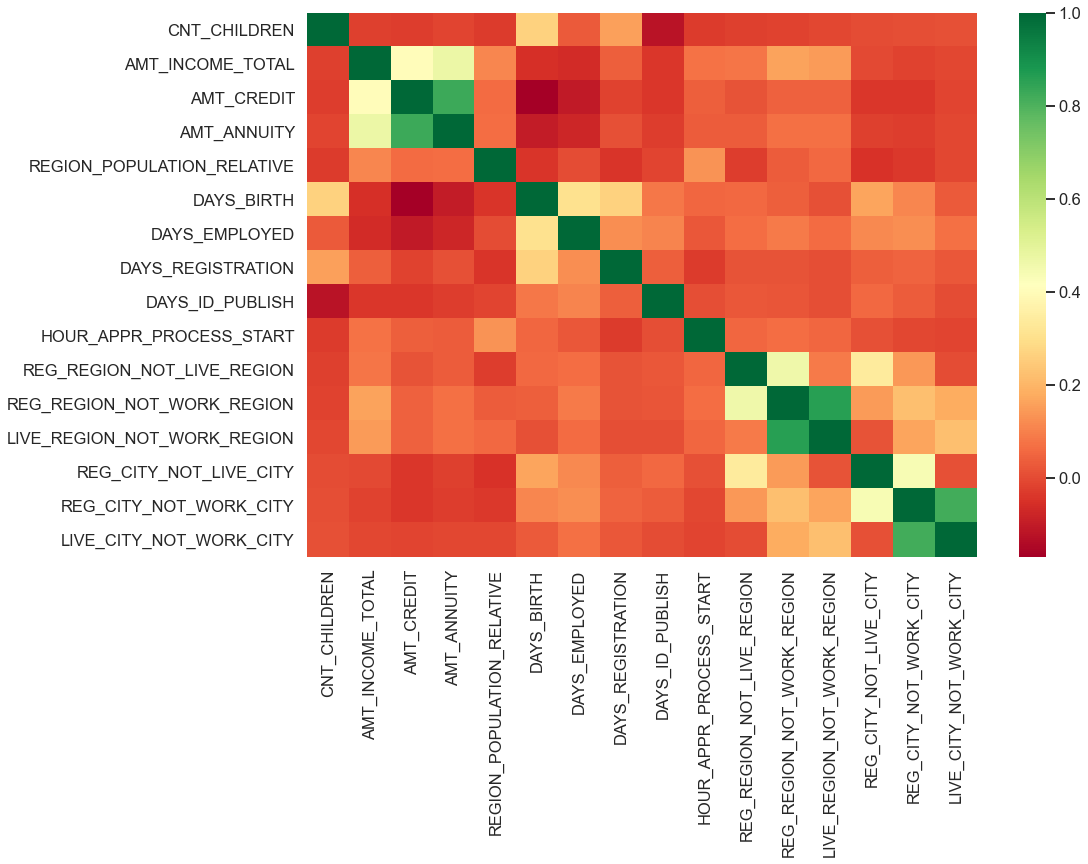

In [107]:
corr_0 = tv_0_corr.corr(method="spearman")
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


sns.heatmap(corr_0, cmap="RdYlGn",annot=False)

plt.yticks(rotation=0)
plt.show()


Conclusions from the correlation of non defaulters:

1. Credit is positively correlated to annuity amount
2. Credit is negatively correlated to age of person
3. Credit is negatively correlated to count of children
4. Income Total is slightly positively correlated with annuity amount and credit


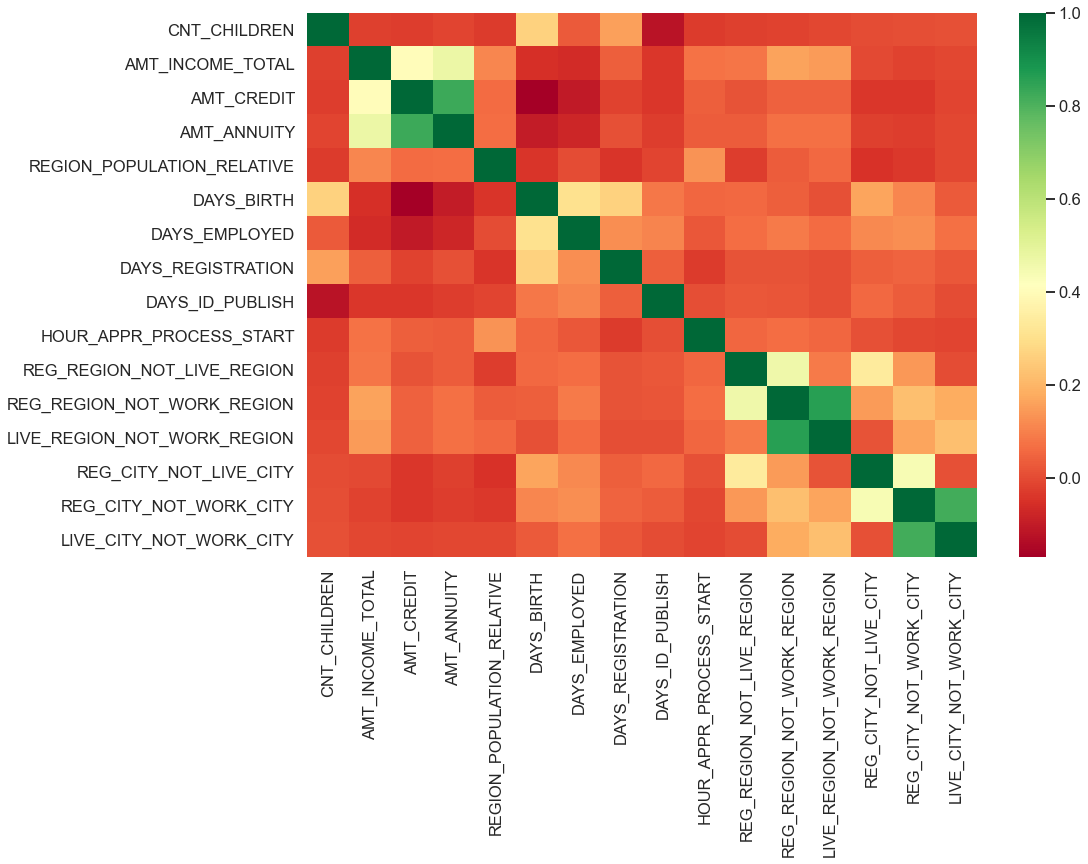

In [108]:
corr_1 = tv_1_corr.corr(method="spearman")
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


sns.heatmap(corr_0, cmap="RdYlGn",annot=False)

plt.yticks(rotation=0)
plt.show()


### Univariate Analysis for Numerical Variables

In [38]:
#Creating a common function to generate boxplots

def boxplot(data, title, col):
    plt.xscale('log')
    plt.title(title)
    sns.boxplot(data=data, x=col)
    plt.show()

### Analysis for Target = 0

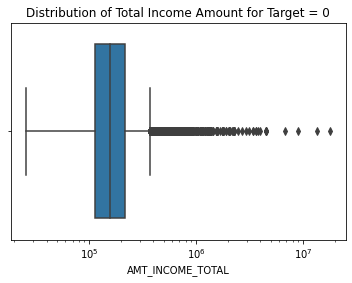

In [39]:
boxplot(data=tv_0, title='Distribution of Total Income Amount for Target = 0', col='AMT_INCOME_TOTAL')

Conclusion from above plot:
1. A lot of variation in income 
2. Some outliers noticed
3. Third quartile constitutes very less clients
4. Most client income amount lay in the first quartile

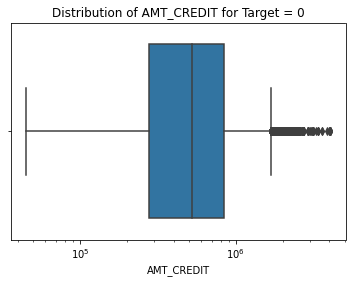

In [40]:
boxplot(data=tv_0, title='Distribution of AMT_CREDIT for Target = 0', col='AMT_CREDIT')

Conclution from above plot:
1. Most of the credits from clients lay in the first quartile
2. Some outliers are observed

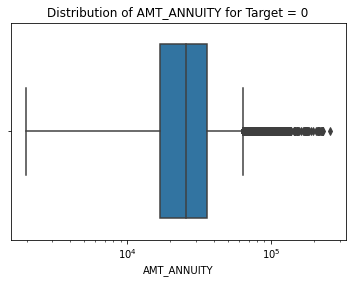

In [41]:
boxplot(data=tv_0, title='Distribution of AMT_ANNUITY for Target = 0', col='AMT_ANNUITY')

Conclusion from above plot:
1. Most clients with annuity lay in the first quartile
2. Some outliers are observed

### Analysis for Target = 1

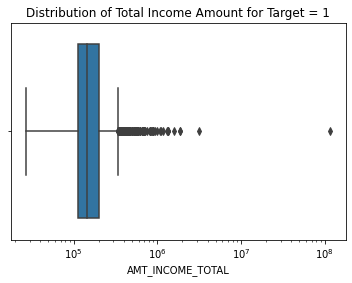

In [42]:
boxplot(data=tv_1, title='Distribution of Total Income Amount for Target = 1', col='AMT_INCOME_TOTAL')

Conclusion from above plot:
2. Some outliers noticed
3. Third quartile constitutes very less clients
4. Most client income amount lay in the first quartile

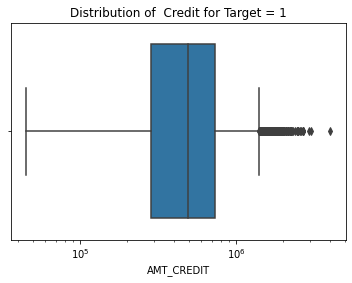

In [43]:
boxplot(data=tv_1, title='Distribution of  Credit for Target = 1', col='AMT_CREDIT')

Conclution from above plot:
1. Most of the credits from clients lay in the first quartile
2. Some outliers are observed

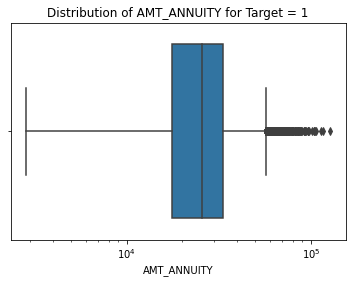

In [44]:
boxplot(data=tv_1, title='Distribution of AMT_ANNUITY for Target = 1', col='AMT_ANNUITY')

Conclusion from above plot:
1. Most clients with annuity lay in the first quartile
2. Some outliers are observed

### Univariate Analysis for Categorical Variables

In [45]:
#Creating a common function to generate countplots

def plotter(df,col,title,hue =None):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(14 , 7)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        
    plt.show()

### Plotting visualizations for Non - Defaulters (TARGET = 0)

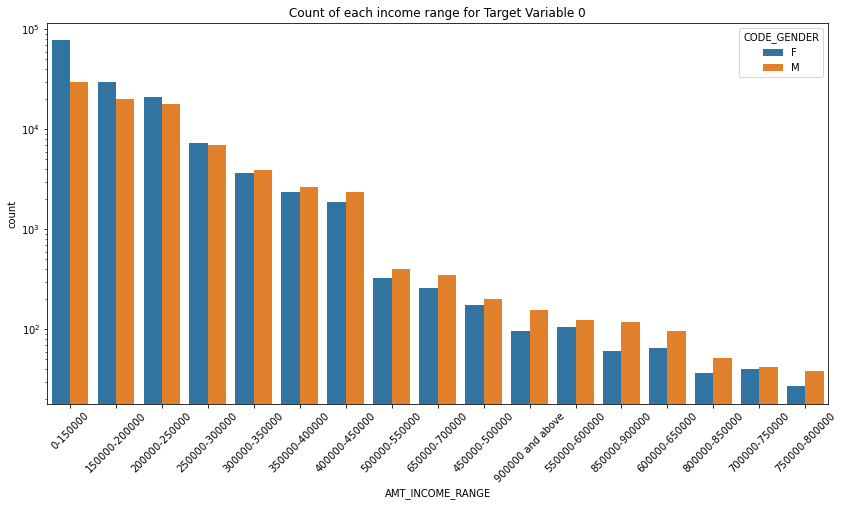

In [46]:
plotter(tv_0, col='AMT_INCOME_RANGE', title='Count of each income range for Target Variable 0', hue='CODE_GENDER')

Conclusions from above plot:
1. Females in general have more credit than males
2. Most people with income range 0-150000
3. Less counts for income range 450000 and above

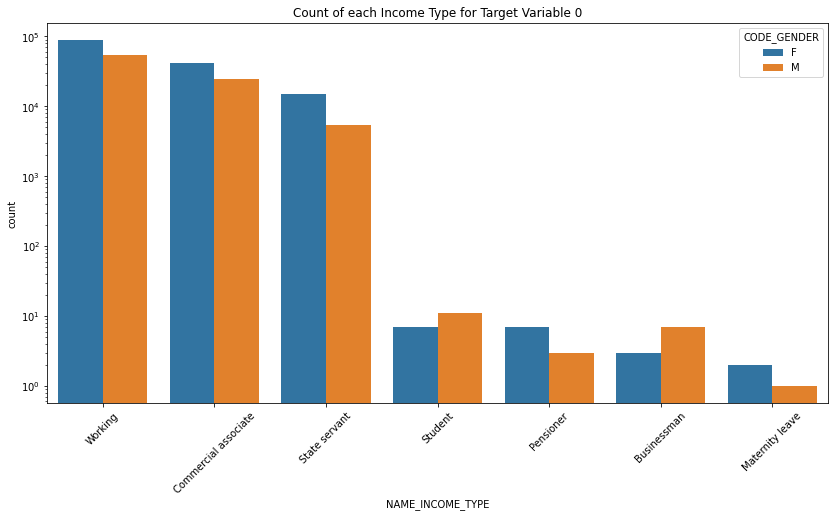

In [47]:
plotter(tv_0, col = 'NAME_INCOME_TYPE', title="Count of each Income Type for Target Variable 0", hue='CODE_GENDER')

Conclusions from above plot:
1. Working, Commercial associate, state servant categories have the most credit
2. Females have more credit than males for the above cases
3. Males have more credit for Student and Businessman categories
4. Student, Pensioner, Businessman have lower credit
5. Maternity leave has the least credit

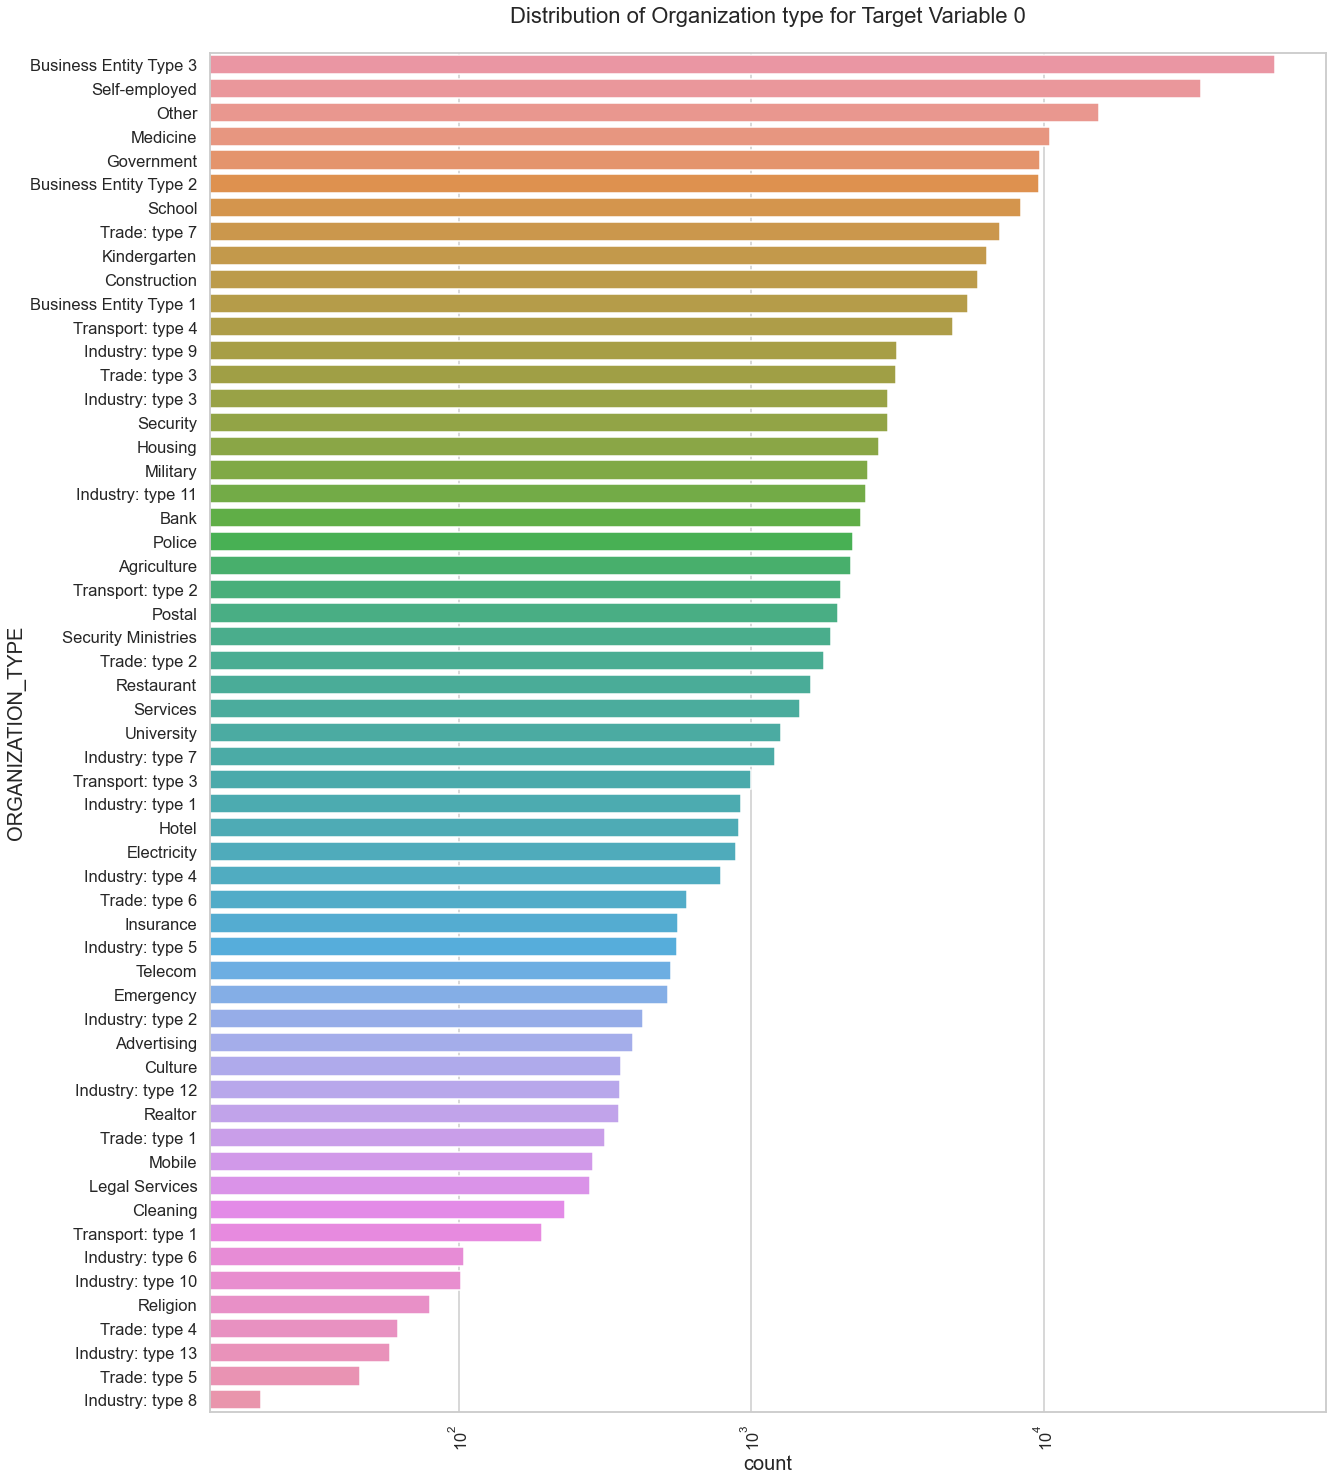

In [48]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,25))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for Target Variable 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=tv_0,y='ORGANIZATION_TYPE',order=tv_0['ORGANIZATION_TYPE'].value_counts().index)

plt.show()

Conclusions from above plot:
1. 'Business Entity Type 3',  'Self-Employed', and 'Other' are constitute top 3
2. Less client from type 8, type 5 and type 13.

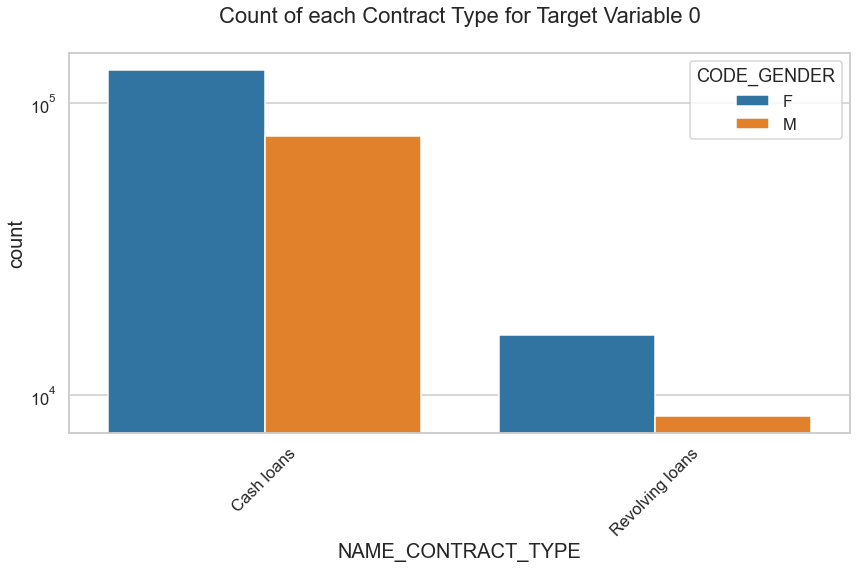

In [49]:
plotter(tv_0, col = 'NAME_CONTRACT_TYPE', title="Count of each Contract Type for Target Variable 0", hue='CODE_GENDER')

Conclusions from above plot:
1. Cash Loans has more credits than Revolving loans
2. Males have negligible credit in case of revolving loans
3. Both cases Females are more who applied in case of Not Defaulting

### Plotting visualizations for Defaulters (TARGET = 1)

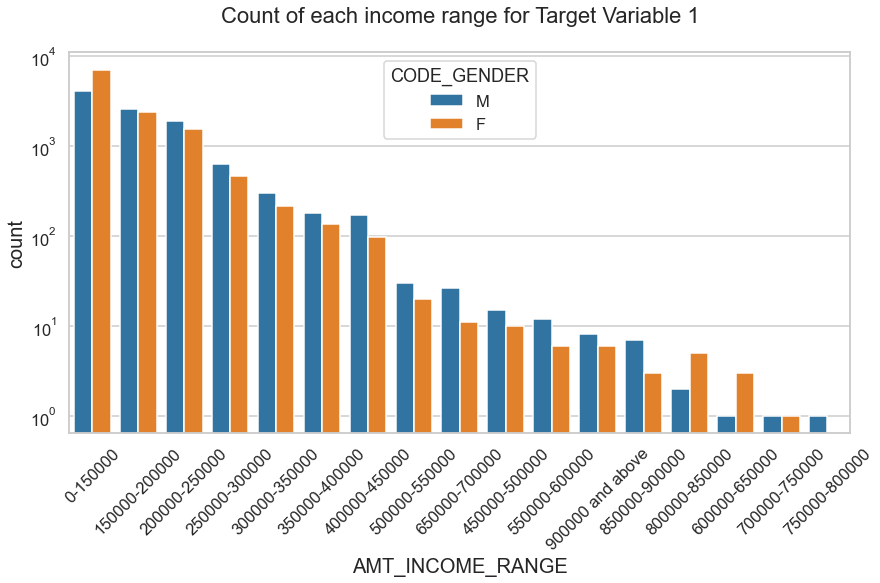

In [50]:
plotter(tv_1, col='AMT_INCOME_RANGE', title='Count of each income range for Target Variable 1', hue='CODE_GENDER')

Conclusions from above plot:
1. Males in general have more credit than Females here
2. Most people with income range 0-150000
3. Less people with income range 600000 and above

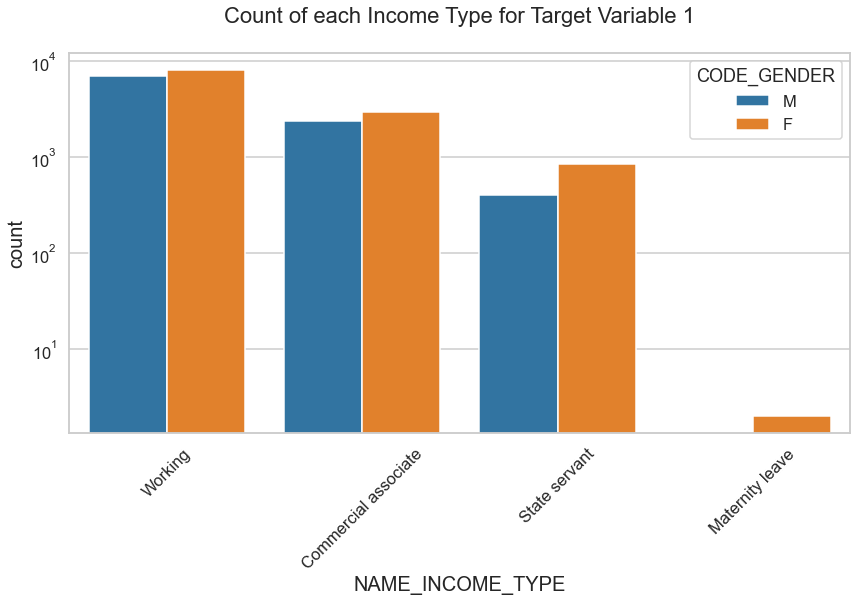

In [51]:
plotter(tv_1, col = 'NAME_INCOME_TYPE', title="Count of each Income Type for Target Variable 1", hue='CODE_GENDER')

Conclusion from the above plot:
1. Working have the most credit
2. Students, Businessmen and pensioners aren't present
3. There are more females accross the board 

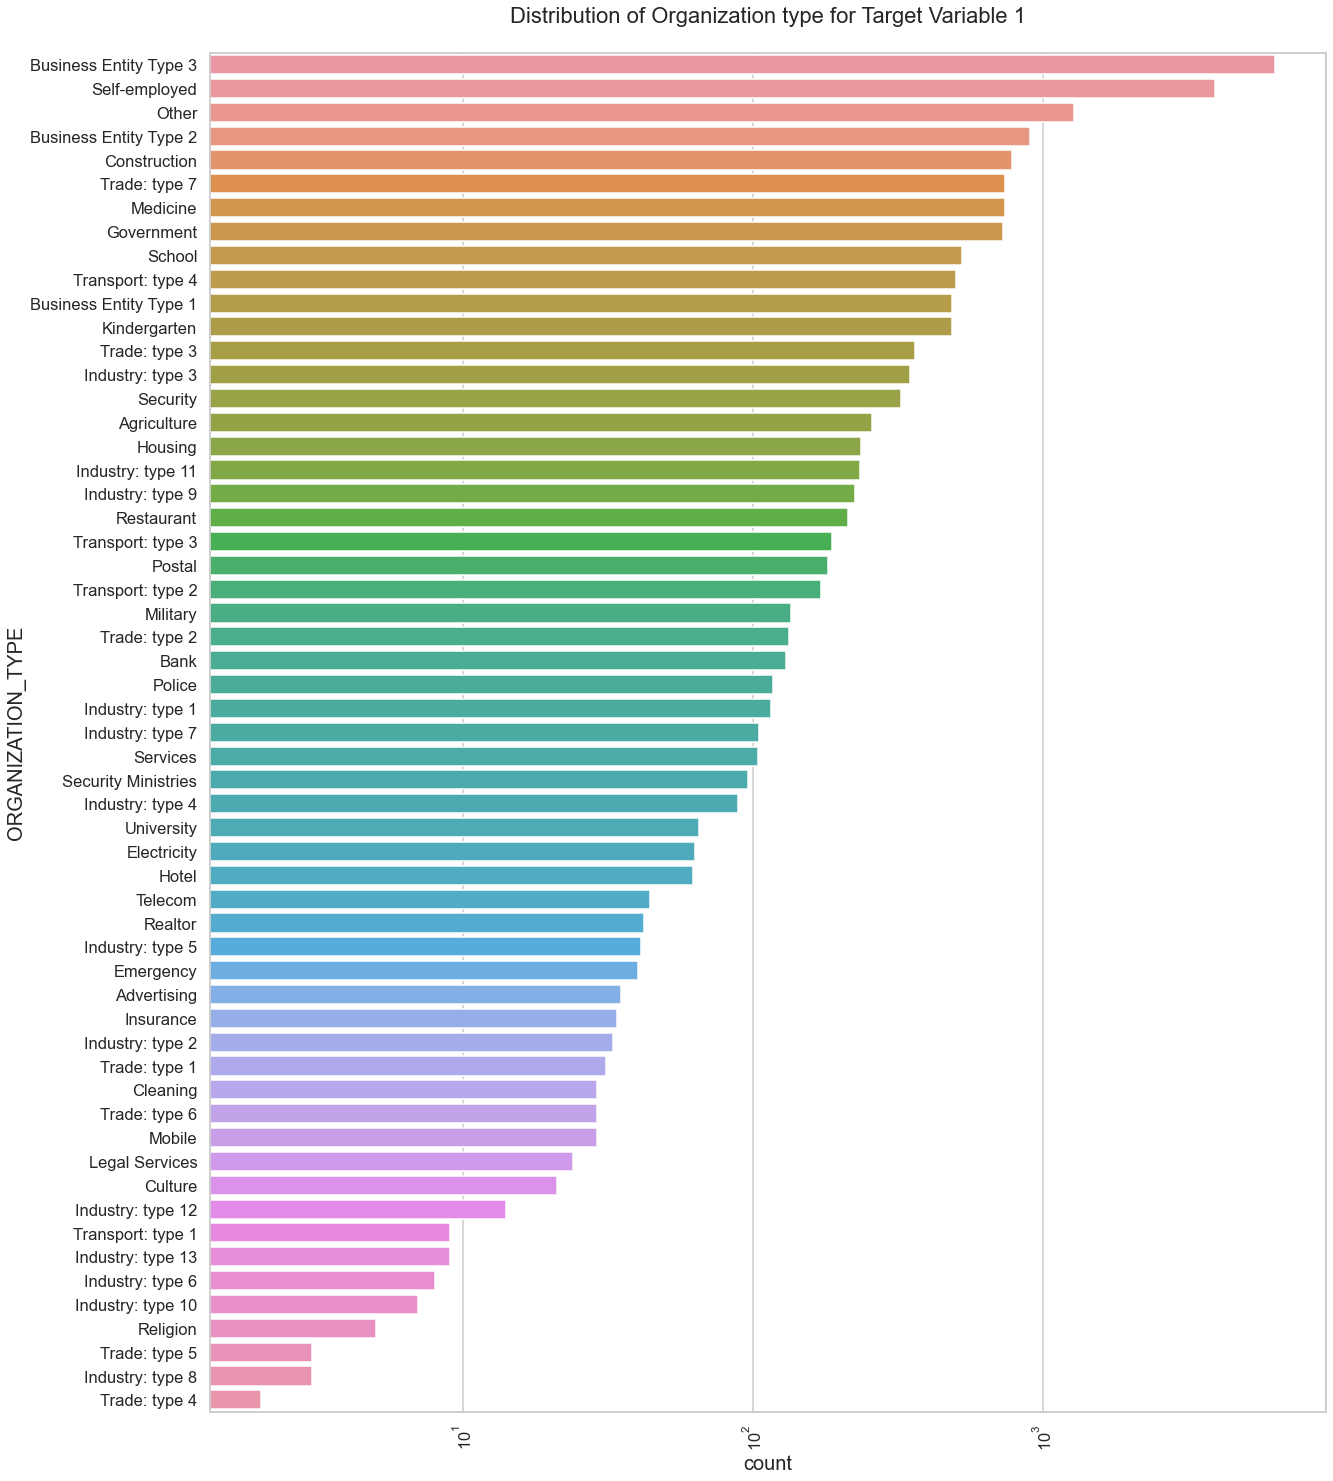

In [52]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,25))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for Target Variable 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=tv_1,y='ORGANIZATION_TYPE',order=tv_1['ORGANIZATION_TYPE'].value_counts().index)

plt.show()

Conclusions from above plot:
1. 'Business Entity Type 3',  'Self-Employed', and 'Other' are constitute top 3
2. Less client from type 8, type 5 and type 4 and religion

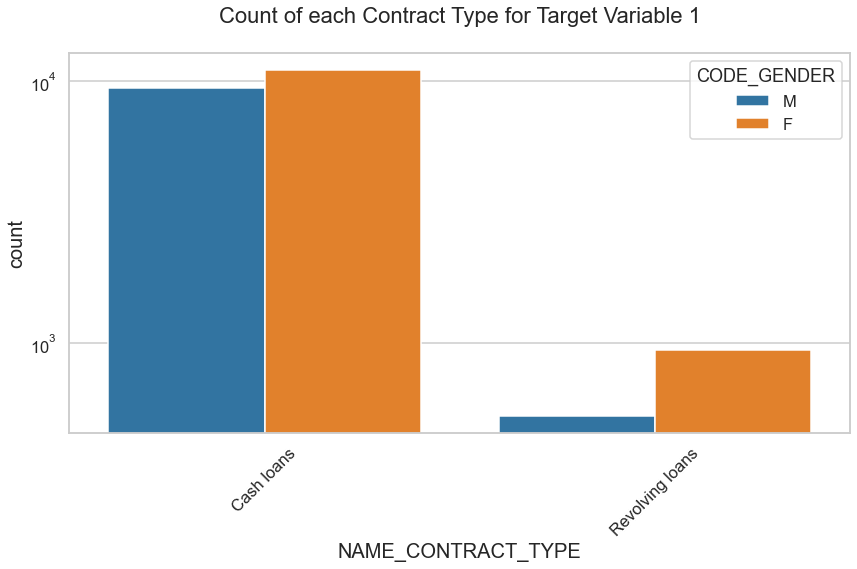

In [53]:
plotter(tv_1, col = 'NAME_CONTRACT_TYPE', title="Count of each Contract Type for Target Variable 1", hue='CODE_GENDER')

Conclusions from above plot:
1. Cash Loans has more credits than Revolving loans
2. Males are negligible in case of Revolving loans
3. Both cases Females are more who applied in case of Defaulting

### Bivariate Analysis

#### Bivariate Analysis of Target = 0

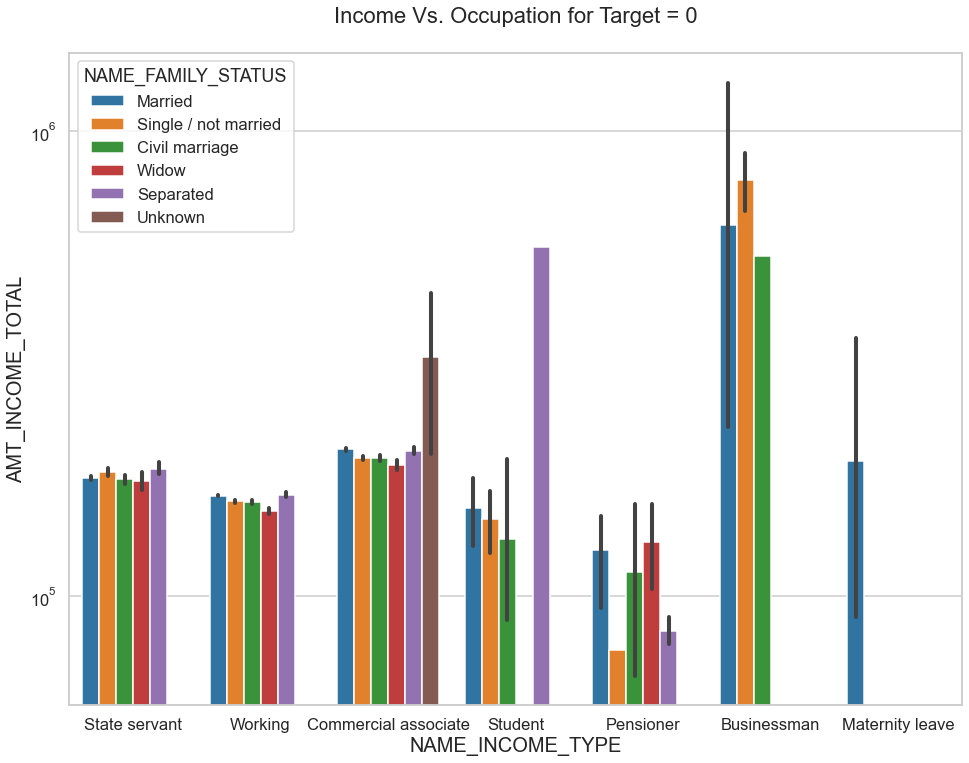

In [54]:
plt.figure(figsize=(16,12))
plt.yscale('log')
plt.title('Income Vs. Occupation for Target = 0')
sns.barplot(data=tv_0, x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS')
plt.show()

Conclusion from above plot:
1. In most cases of occupation Married category has most income
2. Bussinessmen have the most income total
3. Lot of missing data regarding family status for commercial associate
4. Pensioner have the least income

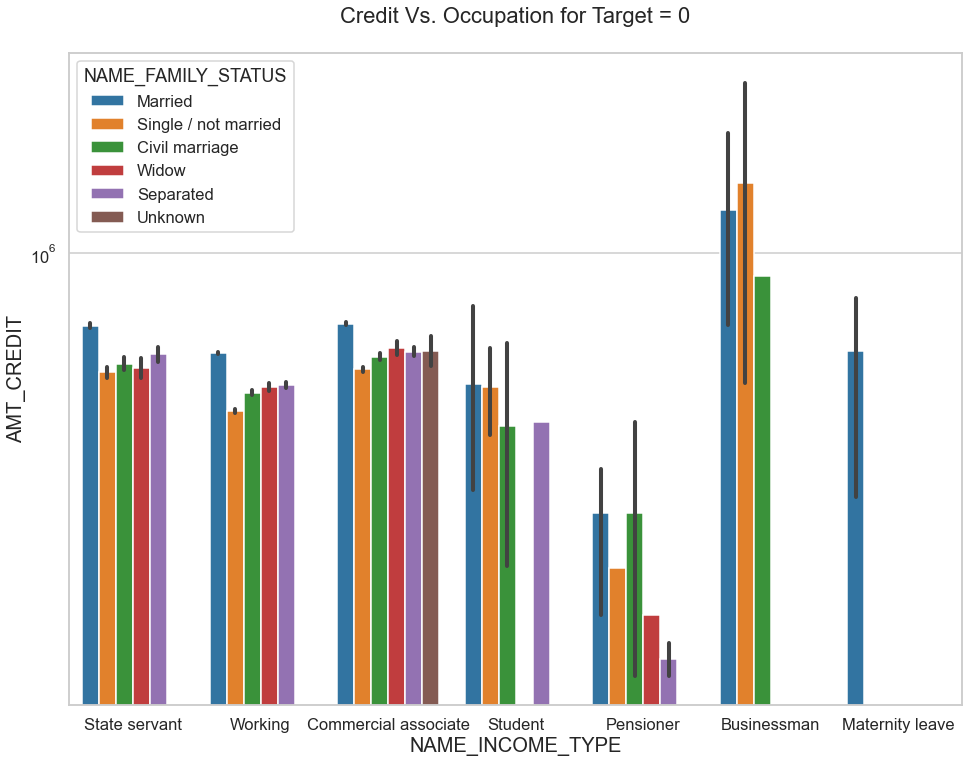

In [55]:

plt.figure(figsize=(16,12))
plt.yscale('log')
plt.title('Credit Vs. Occupation for Target = 0')
sns.barplot(data=tv_0, x='NAME_INCOME_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS')
plt.show()

Conclusion from above plot:
1. In most cases of occupation Married category has most credit
2. Bussinessmen have the most credit followed by Commercial associate and state servant
3. Lot of missing data regarding family status for commercial associate
4. Pensioner have the least credit

#### Bivariate Analysis of Target = 1

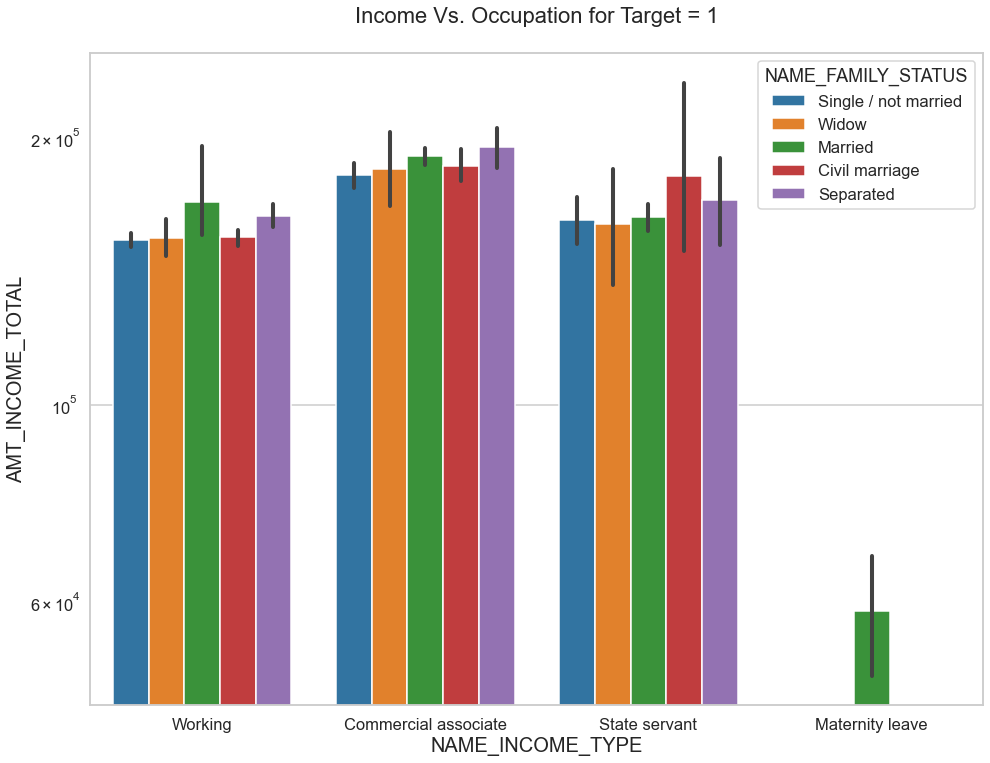

In [56]:
plt.figure(figsize=(16,12))
plt.yscale('log')
plt.title('Income Vs. Occupation for Target = 1')
sns.barplot(data=tv_1, x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS')
plt.show()

Conclusion from above plot:
1. There are no students, businessmen and pensioner
2. Married have most income accross majority of family status
3. Commercial associate is the most earning group

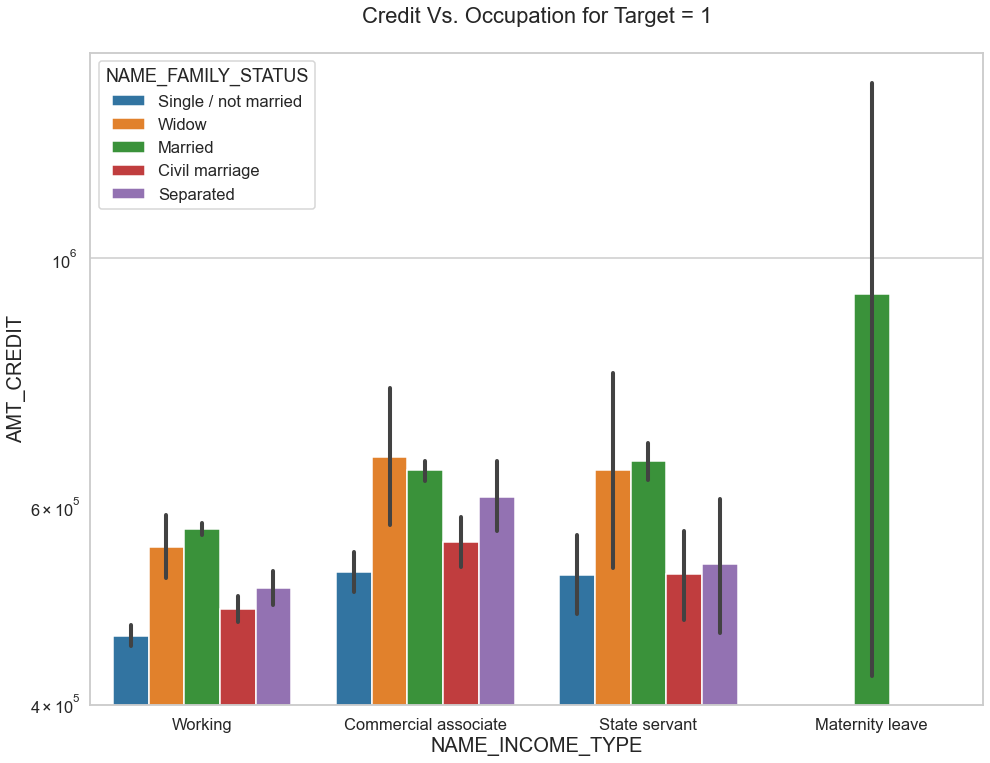

In [57]:

plt.figure(figsize=(16,12))
plt.yscale('log')
plt.title('Credit Vs. Occupation for Target = 1')
sns.barplot(data=tv_1, x='NAME_INCOME_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS')
plt.show()

Conclusion from above plot:
1. Maternity leave category has most credit in case of being defaulter
2. Working have least in credit in case of being defaulter